<a href="https://colab.research.google.com/github/gilbert83416/NTUST-AI-Master-degree-Reference/blob/main/CNN%EF%BC%BFGAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
# mnist: 60000, 28, 28 -> 60000, 28, 28, 1
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0])

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
trans = [       
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

cat


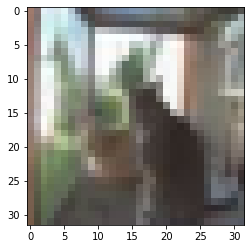

In [ ]:
import random
import matplotlib.pyplot as plt
idx = random.randint(0, 49999)
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
layers = [
    # 一個filter(27) * 64 + 64(bias)
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 576 * 128 + 128
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         1

In [ ]:
# 不需要自己做one-hot
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [ ]:

x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
   EarlyStopping(patience=5, restore_best_weights=True),
   ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 476s - loss: 1.7398 - accuracy: 0.3488 - val_loss: 1.4782 - val_accuracy: 0.4630
Epoch 2/50
225/225 - 474s - loss: 1.3505 - accuracy: 0.5082 - val_loss: 1.2308 - val_accuracy: 0.5552
Epoch 3/50
225/225 - 471s - loss: 1.1382 - accuracy: 0.5935 - val_loss: 1.0520 - val_accuracy: 0.6190
Epoch 4/50
225/225 - 469s - loss: 0.9984 - accuracy: 0.6464 - val_loss: 0.9093 - val_accuracy: 0.6752
Epoch 5/50
225/225 - 470s - loss: 0.9032 - accuracy: 0.6810 - val_loss: 0.9066 - val_accuracy: 0.6902
Epoch 6/50
225/225 - 469s - loss: 0.8155 - accuracy: 0.7154 - val_loss: 0.8273 - val_accuracy: 0.7086
Epoch 7/50
225/225 - 472s - loss: 0.7471 - accuracy: 0.7380 - val_loss: 0.8226 - val_accuracy: 0.7146
Epoch 8/50
225/225 - 467s - loss: 0.6937 - accuracy: 0.7557 - val_loss: 0.7387 - val_accuracy: 0.7412
Epoch 9/50
225/225 - 471s - loss: 0.6344 - accuracy: 0.7766 - val_loss: 0.7247 - val_accuracy: 0.7558
Epoch 10/50
225/225 - 467s - loss: 0.5898 - accuracy: 0.7924 - val_loss: 0.6636 - 

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 23s 74ms/step - loss: 0.6619 - accuracy: 0.7801


[0.661858320236206, 0.7800999879837036]

In [ ]:

pre = model.predict_classes(x_test_norm)
pre

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 8, 8, ..., 5, 1, 7])

In [ ]:
y_test_r = y_test.reshape(-1)
y_test_r.shape

(10000,)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# sklearn: predict_proba/predict
# tensorflow: predict/predict_classes
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
       columns=[trans[i] + "(預測)" for i in range(10)],
       index=[trans[i] + "(正確)" for i in range(10)])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),816,13,33,17,6,3,8,15,68,21
automobile(正確),14,868,3,5,1,2,6,2,25,74
bird(正確),54,3,725,39,45,34,52,22,15,11
cat(正確),14,6,74,633,25,119,55,33,19,22
deer(正確),17,2,93,70,683,31,42,48,10,4
dog(正確),11,1,46,157,31,675,14,36,15,14
frog(正確),5,5,60,56,10,11,829,7,10,7
horse(正確),10,3,44,29,48,40,6,805,2,13
ship(正確),42,13,11,6,1,1,2,5,902,17
truck(正確),25,56,6,5,3,2,6,8,24,865


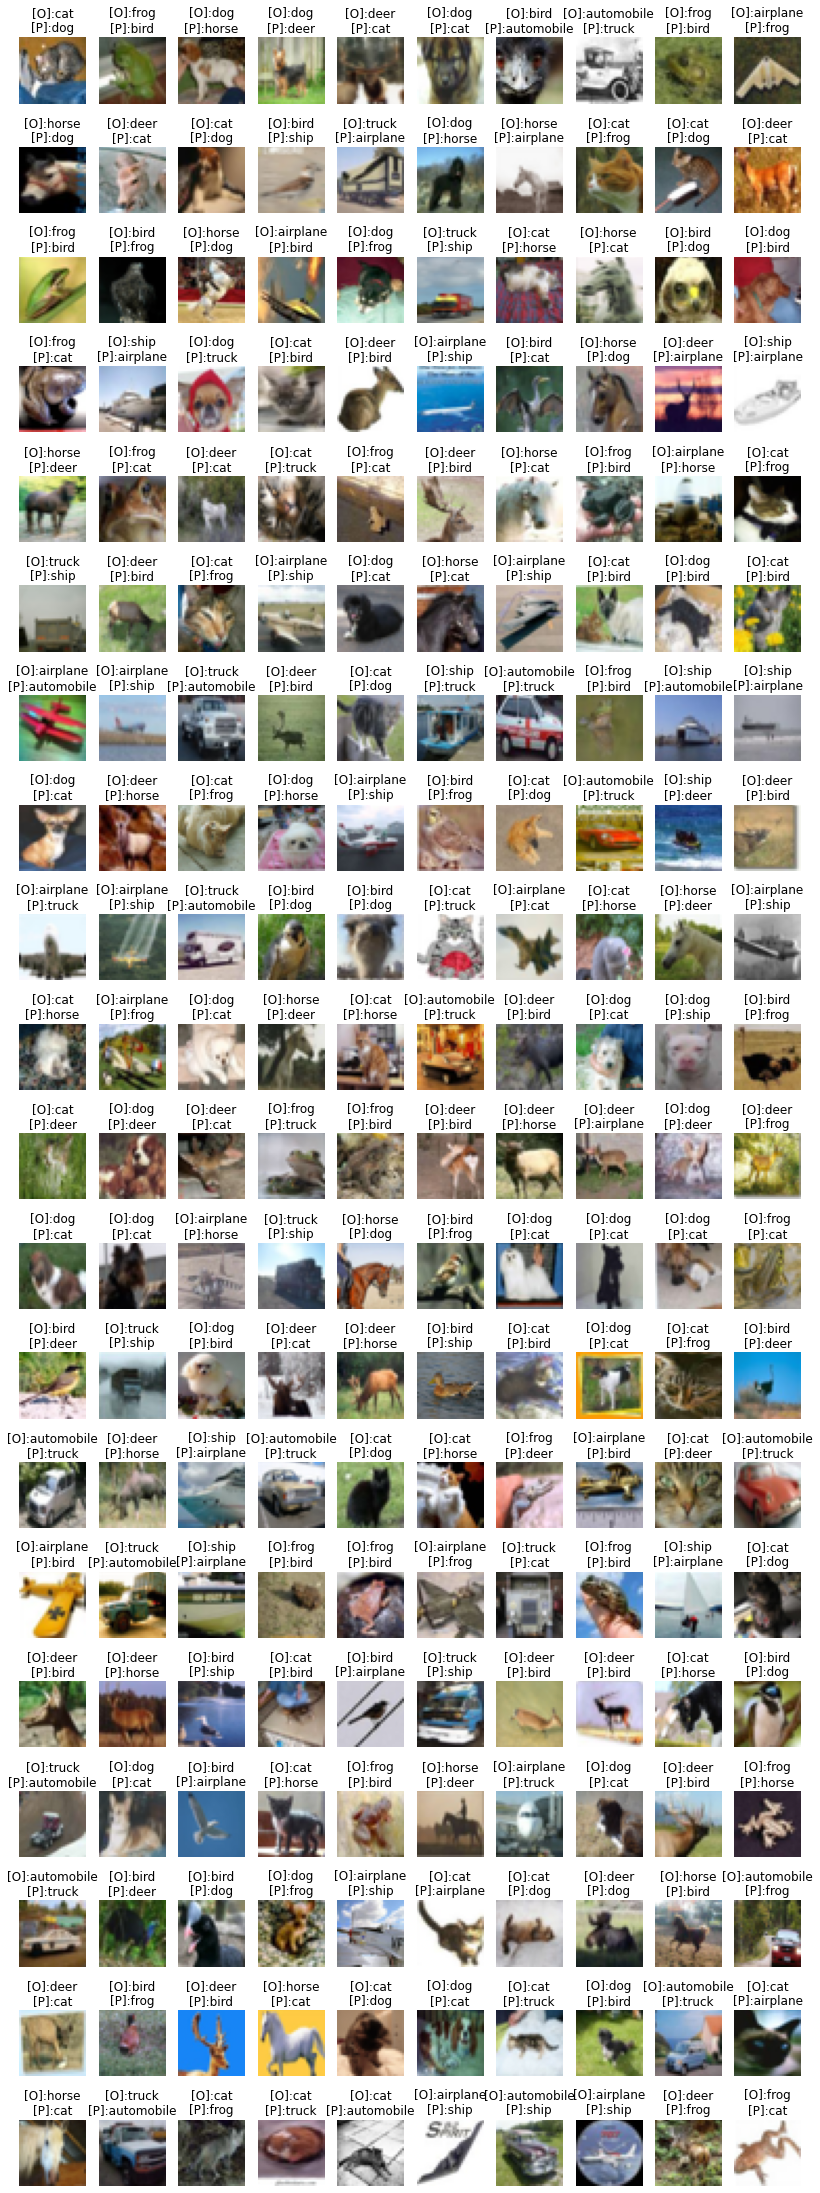

In [ ]:

import numpy as np
idx = np.nonzero(pre != y_test_r)[0][:200]
false_img = x_test[idx]
false_pre = pre[idx]
false_label = y_test_r[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
# Pillow
import requests
from PIL import Image
# RGB, RGBA, L(gray)
url = input("url:")
headers = {
  "user-agent":"user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36"  
}
response = requests.get(url, headers=headers, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img)
img_np_r = img_np.reshape(1, 32, 32, 3) / 255.0
proba = model.predict(img_np_r)[0]
for i in range(10):
    print(trans[i], "的機率:", proba[i])
ans = model.predict_classes(img_np_r)[0]
print("答案:", trans[ans])
plt.imshow(img_np)